<a href="https://colab.research.google.com/github/sudhans18/AI-Driven-Crop-Disease-Management-System/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=25

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


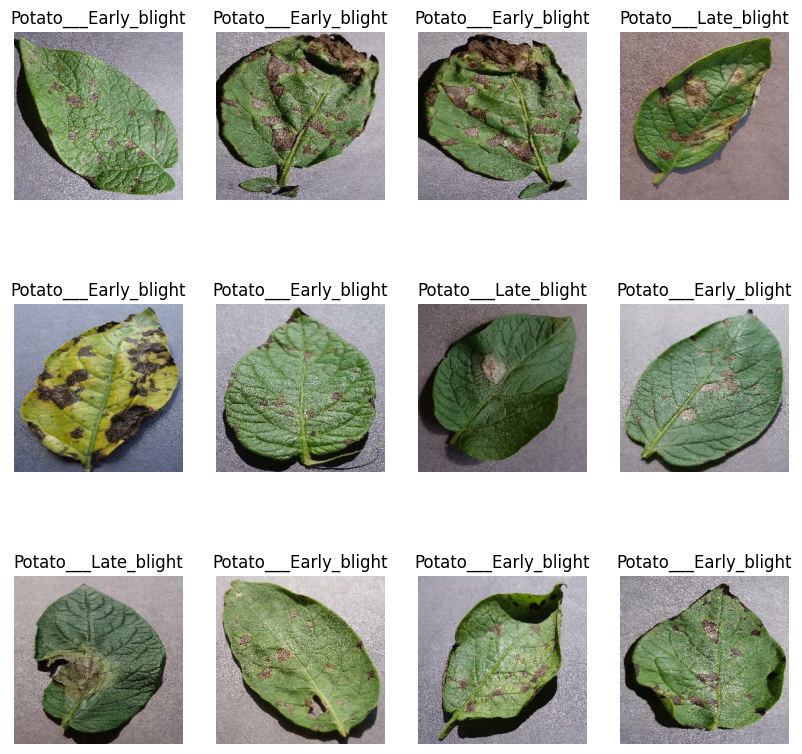

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
len(dataset)

68

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)


14

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [ ]:
n_classes = 3
model = models.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Specify input shape here
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,323 (3.42 MB)

 Trainable params: 896,323 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs= EPOCHS,
)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 69s 896ms/step - accuracy: 0.5139 - loss: 0.9404 - val_accuracy: 0.8438 - val_loss: 0.4790
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8177 - loss: 0.4577 - val_accuracy: 0.8698 - val_loss: 0.3543
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8839 - loss: 0.3122 - val_accuracy: 0.7656 - val_loss: 0.5518
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.8665 - loss: 0.3220 - val_accuracy: 0.9375 - val_loss: 0.1743
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.9200 - loss: 0.1872 - val_accuracy: 0.9219 - val_loss: 0.1897
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9551 - loss: 0.1293 - val_accuracy: 0.9323 - val_loss: 0.1585
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9509 - loss: 0.1060 - val_accuracy: 0.9531 - val_loss: 0.1526
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9826 - loss: 0.0498 - val_accuracy: 0.9531 -

In [ ]:
scores = model.evaluate(test_ds)
scores

8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 175ms/step - accuracy: 0.9829 - loss: 0.0655


[0.11808467656373978, 0.9741379022598267]

In [ ]:
disease_actions = {
    "Potato___Late_blight": {
        "preventive": [
            "Plant disease-resistant crop varieties.",
            "Rotate crops to prevent pathogen buildup.",
            "Avoid overhead irrigation to reduce moisture on leaves."
        ],
        "treatment": [
            "Apply fungicides such as copper-based products.",
            "Remove infected plants to prevent the disease from spreading.",
            "Maintain good air circulation by proper plant spacing."
        ]
    },
    "Potato___Early_blight": {
        "preventive":[
            "Use disease-resistant varieties (e.g., ‘Russet Burbank’).",
            "Rotate crops (avoid planting potatoes in the same field for 2-3 years).",
            "Use drip irrigation to keep foliage dry and water early in the day.",
            "Ensure proper plant spacing to improve air circulation.",
            "Apply mulch to reduce soil splashing and retain moisture.",
            "Remove and destroy crop debris after harvest.",
            "Apply preventive fungicides (e.g., copper-based) as needed.",
            "Avoid over-fertilization with nitrogen; use balanced fertilizers.",
        ],
        "treatment": [
            "Apply fungicides (e.g., copper-based, chlorothalonil, or mancozeb) at the first sign of infection.",
            "Remove infected plant parts to prevent further spread.",
            "Improve air circulation by pruning overcrowded plants.",
            "Rotate fungicides to prevent resistance buildup in the fungus.",
            "Maintain proper irrigation (avoid overhead watering) to minimize moisture on leaves.",
        ]
    }
}

first image to predict
Actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
Predicted label: Potato___Early_blight
Preventive Measures:
- Use disease-resistant varieties (e.g., ‘Russet Burbank’).
- Rotate crops (avoid planting potatoes in the same field for 2-3 years).
- Use drip irrigation to keep foliage dry and water early in the day.
- Ensure proper plant spacing to improve air circulation.
- Apply mulch to reduce soil splashing and retain moisture.
- Remove and destroy crop debris after harvest.
- Apply preventive fungicides (e.g., copper-based) as needed.
- Avoid over-fertilization with nitrogen; use balanced fertilizers.

Treatment Recommendations:
- Apply fungicides (e.g., copper-based, chlorothalonil, or mancozeb) at the first sign of infection.
- Remove infected plant parts to prevent further spread.
- Improve air circulation by pruning overcrowded plants.
- Rotate fungicides to prevent resistance buildup in the fungus.
- Maintain proper irrigation (avoi

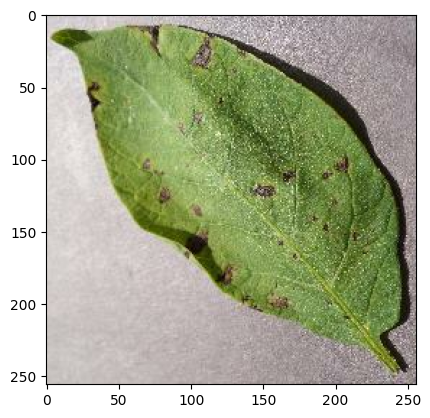

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])

    predicted_class_index = np.argmax(batch_prediction[0])

    predicted_class_label = class_names[predicted_class_index]

    if predicted_class_label in disease_actions:
        preventive_measures = disease_actions[predicted_class_label]['preventive']
        treatment_recommendations = disease_actions[predicted_class_label]['treatment']

        print("Preventive Measures:")
        for measure in preventive_measures:
            print(f"- {measure}")

        print("\nTreatment Recommendations:")
        for treatment in treatment_recommendations:
            print(f"- {treatment}")
    else:
        print(f"No recommendations available for {predicted_class_label}.")

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


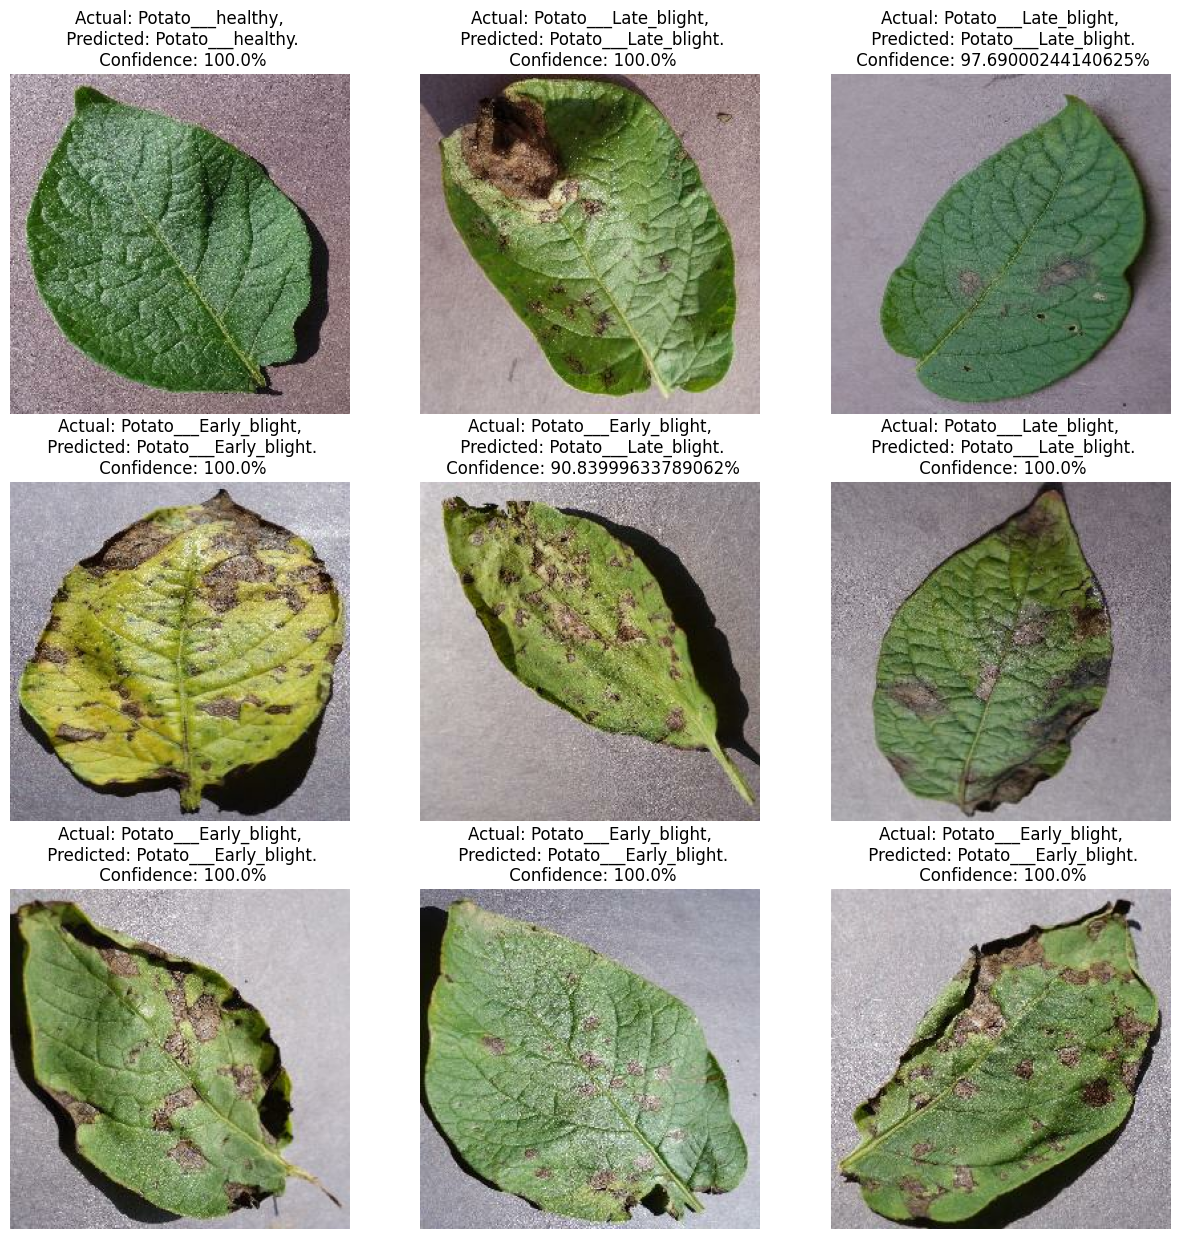

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    # Get the number of images in the batch
    num_images = images.shape[0]
    # Iterate over the images in the batch, ensuring not to exceed the batch size
    for i in range(min(9, num_images)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")